# Introduction

This tutorial provides instructions on nhow to use `city_metrix` to extract different data layers based on user-specific geometry.

Every layer is defined as separate python class:

| Layer name | class name | Parameters | Layer metadata |
| ---- | ---- | ---- | ---- |
| Tropical Tree Cover | `TreeCover()` | `min_tree_cover`: a threshold to use to filter the minimum percent of tree cover| |
| EsaWorldCover | `EsaWorldCover()` | `EsaWorldCoverClass`: a specific class of land cover| |
| Land Surface Temeprature | `LandSurfaceTemperature()` | | |
| High Land Surface Temeprature | `HighLandSurfaceTemperature()` | | |

# Set up

In [1]:
import os
import geopandas as gpd
from rasterio.plot import show
import rasterio
import numpy as np 

In [2]:
# # update the wd path to be able to laod the module
os.chdir('../..')
os.getcwd()

'/home/weiqi_tori/GitHub/wri/cities-cif'

In [3]:
os.environ['GCS_BUCKET']='gee-exports'
os.environ['GOOGLE_APPLICATION_USER']='developers@citiesindicators.iam.gserviceaccount.com'
os.environ['GOOGLE_APPLICATION_CREDENTIALS']='C:\\Users\Saif.Shabou\OneDrive - World Resources Institute\Documents\cities-indicators-framework\citymetrix\credentials-citiesindicators.json'

In [ ]:
from city_metrix.layers import Albedo, EsaWorldCoverClass, EsaWorldCover, HighLandSurfaceTemperature, TreeCover, OpenStreetMap, OpenStreetMapClass

In [8]:
# load boundary
boundary_path = 'https://cities-indicators.s3.eu-west-3.amazonaws.com/data/boundaries/boundary-BRA-Salvador-ADM4union.geojson'
city_gdf = gpd.read_file(boundary_path, driver='GeoJSON')
city_gdf.head()

,geo_id,geo_level,geo_name,geo_parent_name,creation_date,geometry
0,BRA-Salvador_ADM4-union_1,ADM4-union,BRA-Salvador,BRA-Salvador,2022-08-03,"MULTIPOLYGON (((-38.50135 -13.01134, -38.50140..."


# Tropical Tree Cover

In [6]:
from city_metrix.layers import TreeCover

In [ ]:
# Load layer
city_TreeCover = TreeCover().get_data(city_gdf.total_bounds)
city_TreeCover

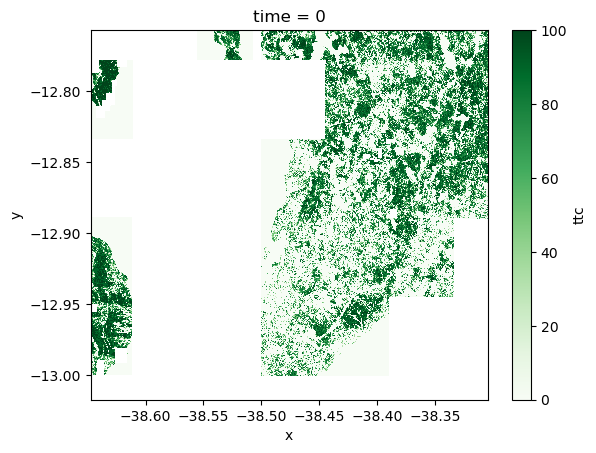

In [13]:
city_TreeCover.plot(cmap="Greens")

Extracting tree cover layer:
[########################################] | 100% Completed | 16.22 s


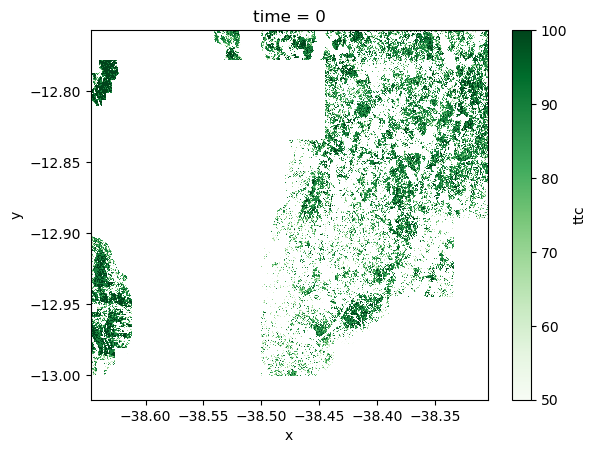

In [14]:
# tropical tree cover by specifying minimum tree cover param
city_TreeCover_50= TreeCover(min_tree_cover = 50).get_data(city_gdf.total_bounds)
city_TreeCover_50.plot(cmap="Greens")

# ESA World Cover

In [15]:
from city_metrix.layers import EsaWorldCoverClass, EsaWorldCover

In [16]:
# Load World cover layer
city_LandCover = EsaWorldCover().get_data(city_gdf.total_bounds)
city_LandCover

Extracting ESA world cover layer:
[########################################] | 100% Completed | 9.69 ss


<xarray.DataArray 'Map' (y: 2878, x: 3721)>
array([[80., 80., 80., ..., 30., 30., 30.],
       [80., 80., 80., ..., 30., 30., 30.],
       [80., 80., 80., ..., 30., 30., 30.],
       ...,
       [50., 50., 50., ..., 80., 80., 80.],
       [50., 50., 50., ..., 80., 80., 80.],
       [50., 50., 50., ..., 80., 80., 80.]])
Coordinates:
    time     datetime64[ns] 2020-01-01
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             Map
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max'...
    dimensions:     [4320000, 1728000]
    crs:            EPSG:4326
    crs_transform:  [8.333333333333333e-05, 0, -180, 0, -8.333333333333333e-0...

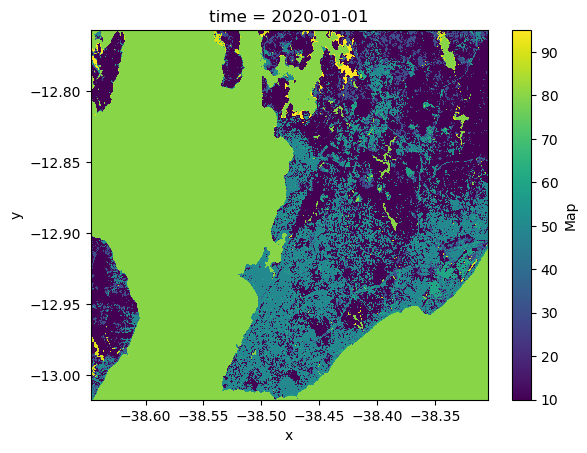

In [18]:
city_LandCover.plot()

Extracting ESA world cover layer:
[########################################] | 100% Completed | 7.91 ss


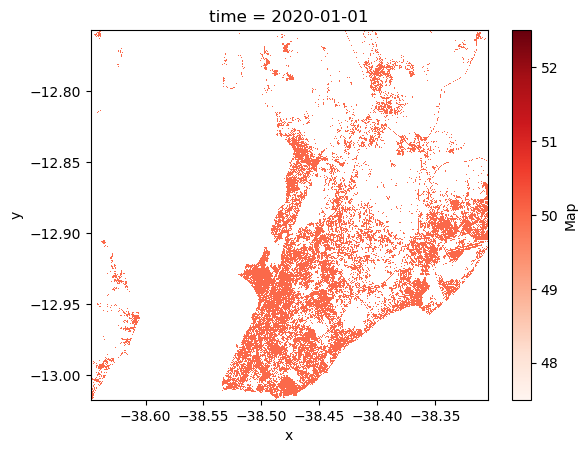

In [22]:
# Load World cover - built up layer
city_LandCoverBuiltUp = EsaWorldCover(land_cover_class=EsaWorldCoverClass.BUILT_UP).get_data(city_gdf.total_bounds)
city_LandCoverBuiltUp.plot(cmap = "Reds")

# Land surface temperature

In [23]:
from city_metrix.layers import HighLandSurfaceTemperature, LandSurfaceTemperature

## High land surface temeprature without specifying a period of interest

In [24]:
%%time

city_high_lst = HighLandSurfaceTemperature().get_data(city_gdf.total_bounds)
city_high_lst

Calculating land surface temperature layer:
[########################################] | 100% Completed | 3.81 ss
CPU times: total: 3.86 s
Wall time: 5.13 s


<xarray.DataArray 'ST_B10_mean' (y: 959, x: 1240)>
array([[        nan,         nan,         nan, ..., 36.5482103 ,
        36.51061208, 38.10682742],
       [        nan,         nan,         nan, ..., 36.38072732,
        36.35338316, 35.65439807],
       [        nan,         nan,         nan, ..., 36.26109662,
                nan, 36.32774801],
       ...,
       [37.07971241, 37.23978968, 37.45626428, ...,         nan,
                nan,         nan],
       [36.9298892 , 37.08483944, 37.21757255, ...,         nan,
                nan,         nan],
       [36.67296803, 36.7760783 , 36.8102585 , ...,         nan,
                nan,         nan]])
Coordinates:
    time     int32 0
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.31 -38.31 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             ST_B10_mean
    data_type:      {'type': 'PixelType', 'precision': 'double', 'min': -124....
    crs:            EPSG:4326
    crs_transform:  [1, 0, 0, 0, 1, 0]

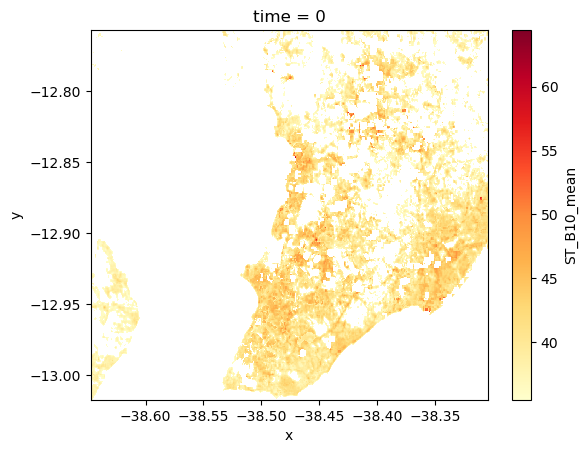

In [25]:
city_high_lst.plot(cmap = "YlOrRd")

## High land surface temeprature by specifying a period of interest

Calculating land surface temperature layer:
[########################################] | 100% Completed | 2.51 ss
CPU times: total: 1.62 s
Wall time: 4.26 s


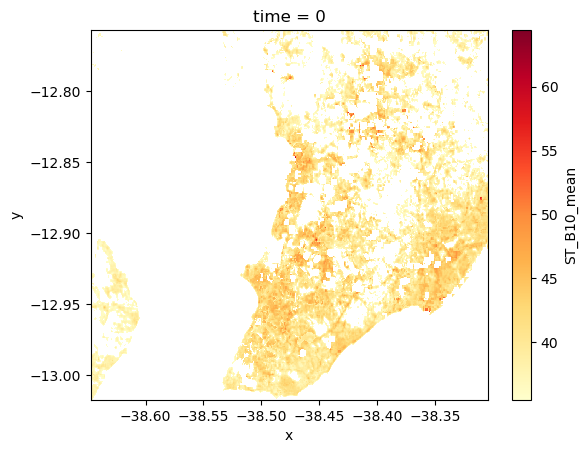

In [26]:
%%time

# Select a period of interest
city_high_lst = HighLandSurfaceTemperature(start_date="2013-01-01", end_date="2023-01-01").get_data(city_gdf.total_bounds)
city_high_lst.plot(cmap = "YlOrRd")

## Average Land Surface Temperature

Calculating land surface temperature layer:
[########################################] | 100% Completed | 22.70 s
CPU times: total: 1.75 s
Wall time: 23.8 s


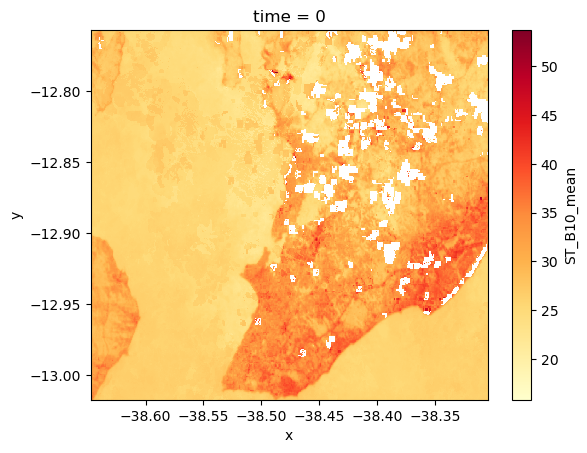

In [28]:
%%time

city_lst = LandSurfaceTemperature(start_date="2013-01-01", end_date="2023-01-01").get_data(city_gdf.total_bounds)
city_lst.plot(cmap = "YlOrRd")

In [29]:
city_lst.mean()

<xarray.DataArray 'ST_B10_mean' ()>
array(28.21532794)
Coordinates:
    time     int32 0

In [40]:
# Select one year
city_lst_2022 = LandSurfaceTemperature(start_date="2022-01-01", end_date="2022-12-01").get_data(city_gdf.total_bounds)
city_lst_2022.mean()

Calculating land surface temperature layer:
[########################################] | 100% Completed | 3.21 ss


<xarray.DataArray 'ST_B10_mean' ()>
array(29.61884345)
Coordinates:
    time     int32 0

# Albedo

In [51]:
from city_metrix.layers import Albedo

In [52]:
city_albedo = Albedo().get_data(city_gdf.total_bounds)
city_albedo

C:\Users\Saif.Shabou\anaconda3\envs\citymetrix_env\lib\site-packages\xee\ext.py:551: UserWarning: Unable to retrieve 'system:time_start' values from an ImageCollection due to: No 'system:time_start' values found in the 'ImageCollection'.
  warnings.warn(


Calculating albedo layer:
[########################################] | 100% Completed | 106.55 s


<xarray.DataArray 'albedo_mean' (y: 2877, x: 3721)>
array([[0.04225504, 0.04137229, 0.04781161, ..., 0.12281121, 0.12393972,
        0.12843561],
       [0.03762384, 0.03742259, 0.03767811, ..., 0.12736931, 0.12629641,
        0.12510681],
       [0.0365342 , 0.03754481, 0.03727708, ..., 0.12735285, 0.11464872,
        0.12083671],
       ...,
       [0.21124599, 0.19651568, 0.22467322, ..., 0.04240314, 0.0442719 ,
        0.04177873],
       [0.2288018 , 0.21098689, 0.23221282, ..., 0.04277986, 0.04334876,
        0.04126065],
       [0.21718846, 0.20405551, 0.23317311, ..., 0.04020636, 0.043003  ,
        0.03861804]])
Coordinates:
    time     int32 0
  * x        (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3 -38.3
  * y        (y) float32 -12.76 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
Attributes:
    id:             albedo_mean
    data_type:      {'type': 'PixelType', 'precision': 'double'}
    crs:            EPSG:4326
    crs_transform:  [8.983152841195215e-05, 0, 0, 0, -8.983152841195215e-05, 0]

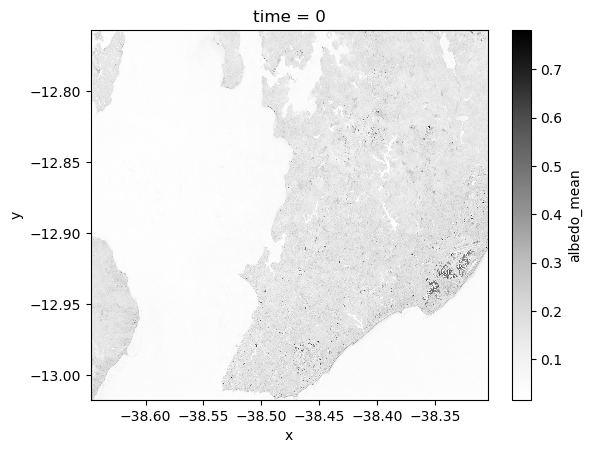

In [53]:
city_albedo.plot(cmap = "Greys")

# Natural areas

In [9]:
from city_metrix.layers import NaturalAreas

In [10]:
from city_metrix.layers.natural_areas import NaturalAreas

In [11]:
# Load Natural areas layer
city_NaturalAreas = NaturalAreas().get_data(city_gdf.total_bounds)
city_NaturalAreas

Extracting ESA world cover layer:
[########################################] | 100% Completed | 32.94 s


<xarray.DataArray 'Map' (y: 2878, x: 3722)>
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
    time         datetime64[ns] 2020-01-01
  * x            (x) float32 -38.65 -38.65 -38.65 -38.65 ... -38.3 -38.3 -38.3
  * y            (y) float32 -12.76 -12.76 -12.76 ... -13.02 -13.02 -13.02
    spatial_ref  int64 0

# Open Street Map

In [12]:
from city_metrix.layers import OpenStreetMap, OpenStreetMapClass

In [13]:
# Load OSM open space layer
city_open_space = OpenStreetMap(osm_class=OpenStreetMapClass.OPEN_SPACE).get_data(city_gdf.total_bounds)
city_open_space.head()

,osmid,geometry,leisure,boundary
0,29204845,"POLYGON ((-38.41202 -12.96888, -38.41160 -12.9...",NaN,protected_area
1,29415494,"POLYGON ((-38.47611 -12.99642, -38.47608 -12.9...",park,NaN
2,29415495,"POLYGON ((-38.44212 -12.99757, -38.44152 -12.9...",park,NaN
3,48623160,"POLYGON ((-38.49373 -13.01117, -38.49374 -13.0...",pitch,NaN
4,48623169,"POLYGON ((-38.49005 -13.01025, -38.49002 -13.0...",park,NaN


<Axes: >

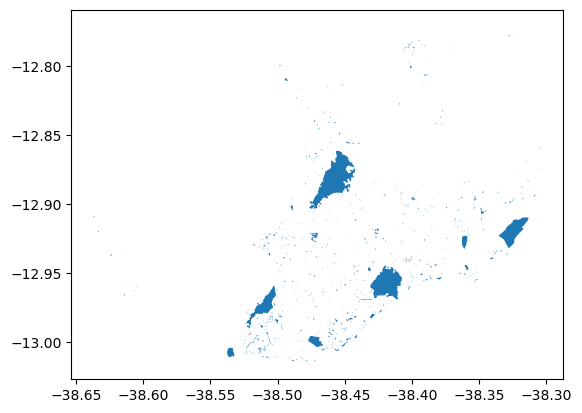

In [14]:
city_open_space.plot()